In [55]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
path = "C://Users//Dimitri//Desktop//ENSAE3A//NetworkData//Data//"

In [5]:
attrs_nos = pd.read_csv(path + "attrs_nos.csv", encoding = "ISO-8859-1")

In [6]:
attrs_nos

,Unnamed: 0,url,title,authors,date,jel_code,keywords,editor,journal,article_id,authors_list,authors_nos
0,0,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,The Reaction in Political Economy,Charles F. Dunbar,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p1-27..html,['Charles F. Dunbar'],[6160]
1,1,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Private Monopolies and Public Rights,Arthur T. Hadley,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p28-44..html,['Arthur T. Hadley'],[3334]
2,2,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Silver Before Congress in 1886,S. Dana Horton,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p45-75..html,['S. Dana Horton'],[36527]
3,3,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,"The Arithmetic, Geometric, and Harmonic Means",F. Coggeshall,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p83-86..html,['F. Coggeshall'],[11962]
4,4,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Legislation for Labor Arbitration,H. M. Williams,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p86-91..html,['H. M. Williams'],[15170]
5,5,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Correspondence,Arthur Mangin,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p91-102..html,['Arthur Mangin'],[3314]
6,6,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,An Historical Sketch of the Knights of Labor,Carroll D. Wright,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p137-168..html,['Carroll D. Wright'],[5822]
7,7,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,The Disposition of Our Public Lands,Albert Bushnell Hart,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p169-183..html,['Albert Bushnell Hart'],[1003]
8,8,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,The South-Western Strike of 1886,F. W. Taussig,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p184-222..html,['F. W. Taussig'],[31109]
9,9,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,Marshall's Theory of Value and Distribution,J. Laurence Laughlin,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p227-232..html,['J. Laurence Laughlin'],[17717]


In [16]:
def str_to_list(x):
    x = x.replace("[", "")
    x = x.replace("]", "")
    splitted = x.split(", ")
    no_list = [int(i) for i in splitted]
    return no_list

In [17]:
attrs_nos["authors_nos"] = attrs_nos["authors_nos"].apply(str_to_list)

In [26]:
def get_edges_list(auths_nums):
    edges_list = []
    auths_nums_reduced = auths_nums[auths_nums.apply(lambda x: len(x)) > 1]
    for auth_list in auths_nums_reduced:
        combinations = list(itertools.combinations(auth_list, 2))
        edges_list += combinations
    return edges_list         

In [30]:
auths_nos = attrs_nos["authors_nos"]
edges_list = get_edges_list(auths_nos)

In [31]:
edges_list

[(1499, 17717),
 (41344, 36583),
 (10735, 4646),
 (10803, 31109),
 (18361, 42689),
 (13297, 42309),
 (17631, 31109),
 (18361, 42689),
 (162, 31109),
 (162, 31109),
 (23621, 31109),
 (43065, 42145),
 (43065, 42055),
 (43065, 17596),
 (42145, 42055),
 (42145, 17596),
 (42055, 17596),
 (16068, 35902),
 (31109, 39650),
 (23176, 16343),
 (32779, 23940),
 (11896, 42074),
 (31109, 15103),
 (523, 31109),
 (12760, 39624),
 (5660, 12272),
 (17693, 20443),
 (15877, 20774),
 (33761, 3320),
 (162, 29101),
 (162, 29624),
 (29101, 29624),
 (11952, 15715),
 (13030, 10516),
 (13030, 198),
 (10516, 198),
 (40061, 42519),
 (20443, 42051),
 (25091, 20774),
 (15864, 11112),
 (26810, 31693),
 (42539, 20443),
 (26810, 31693),
 (35075, 4077),
 (17564, 42051),
 (17564, 30544),
 (42051, 30544),
 (11146, 36210),
 (15651, 34887),
 (20443, 42539),
 (14609, 31693),
 (22079, 24574),
 (17287, 215),
 (17287, 10443),
 (215, 10443),
 (6115, 11780),
 (22079, 24574),
 (14609, 31693),
 (6087, 42123),
 (39661, 30555),
 (421

In [36]:
def sort_edges(edges_list):
    sorted_edges_list = []
    for edge in edges_list:
        edge_l = list(edge)
        edge_l.sort()
        sorted_edges_list.append(tuple(edge_l))
    sorted_edges_list.sort()
    return sorted_edges_list

In [37]:
s_edges_list = sort_edges(edges_list)
print(s_edges_list)

In [44]:
def weighted_edges_list(sorted_edges_list):
    counter_dict = dict(Counter(sorted_edges_list))
    nx_dict = dict()
    for key in counter_dict.keys():
        nx_dict[key[0]] = {key[1]: {'weight': counter_dict[key]}}
    return nx_dict

In [45]:
nx_dict = weighted_edges_list(s_edges_list)

In [32]:
def get_nodes_list(auths_nums):
    concat = []
    for auth_list in auths_nums:
        concat +=  auth_list
    return list(set(concat))

In [34]:
nodes_list = get_nodes_list(auths_nos)

In [47]:
# Create graphs only from edges
authors_graph = nx.Graph(nx_dict)
# Add the nodes that have no edges


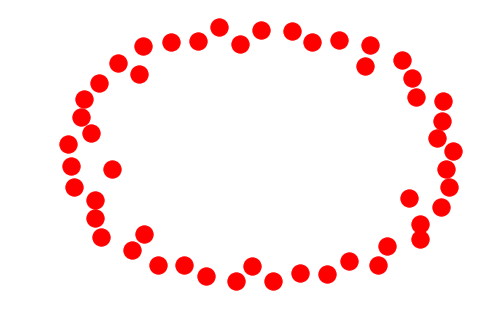

In [57]:
sub_graph = authors_graph.subgraph(list(authors_graph.nodes)[0:50])
nx.draw(sub_graph)
plt.show()